In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/test812.csv"

df = pd.read_csv(fpath)
df = df.drop(columns='Unnamed: 0')
print(f"{df.shape=}")
df.head()

df.shape=(2520, 6)


,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604


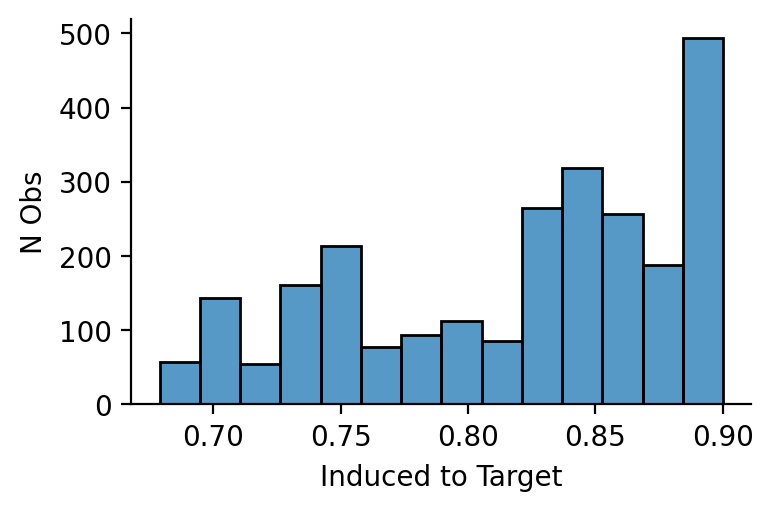

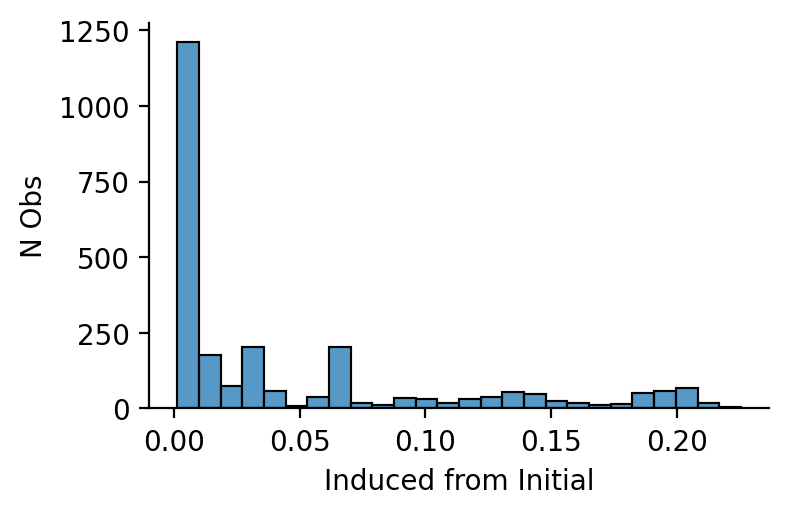

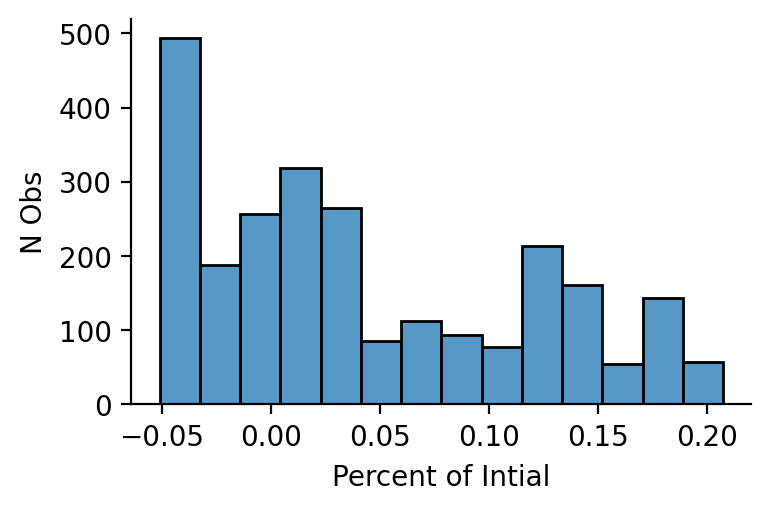

In [13]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 2.5

col_map = {
    'reprog_to_hsc_1' : 'Induced to Target', 
    'fib_1_to_reprog_10' : 'Induced from Initial', 
    'recipe_diff' : 'Percent of Intial',
}

for col, label in col_map.items():
    sns.histplot(
        data=df,
        x=col,
    )
    plt.ylabel('N Obs')
    plt.xlabel(label)
    sns.despine()
    plt.show()


In [20]:
"""make a recipe as a list column"""

def recipe_splitter(x):
    return x.split(";")
    
df['recipe_list'] = df['recipe'].apply(recipe_splitter)
df.head()

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]"
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]"
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]"
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]"
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]"


In [22]:
def one_hot_encode_list_column(df, column_name):
    """
    One-hot encodes a column containing lists in a DataFrame.

    Args:
        df: The DataFrame containing the column to encode.
        column_name: The name of the column containing lists.

    Returns:
        The DataFrame with the original column and the one-hot encoded columns.
    """
    mlb = MultiLabelBinarizer()
    one_hot_encoded = mlb.fit_transform(df[column_name])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
    return pd.concat([df, one_hot_df], axis=1)


df = one_hot_encode_list_column(df, 'recipe_list')
df.head()

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0


Text(0.5, 0, 'Percent of Intial')

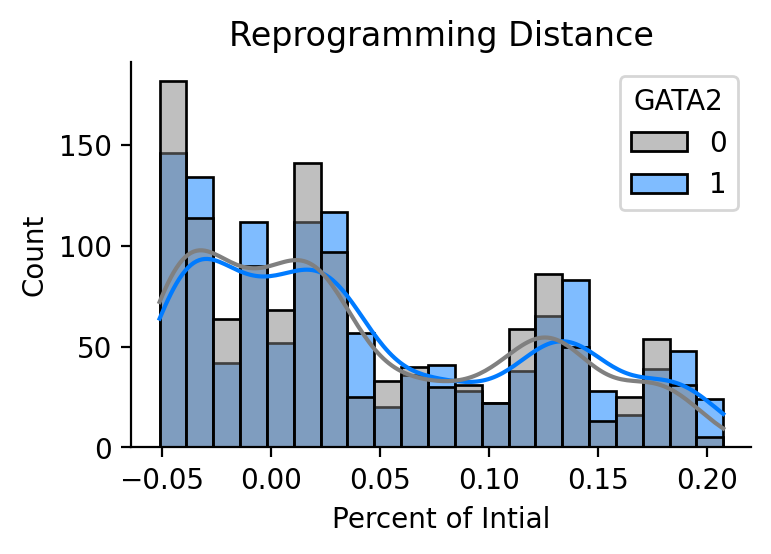

In [53]:
color_palette = [
    "#F08080",  # Light Coral (from the pink tulips)
    "#FFD700",  # Gold (from the yellow flowers)
    "#4169E1",  # Royal Blue (from the blue flowers)
    "#006400",  # Dark Green (from the foliage)
    "#FFA500",  # Orange (from the orange tulips)
    "#FFFFFF",  # White (from the white tulips)
    "#87CEEB",  # Sky Blue (from the water)
    "#6B8E23",  # Olive Drab (from the shadows in the foliage)
    "#D2B48C",  # Tan (from the tree trunks)
    "#90EE90",  # Light Green (from the lighter areas of the lawn)
]


sns.histplot(
    data=df, 
    x='recipe_diff',
    bins=21,
    hue='GATA2',
    kde=True,
    palette=['grey', '#007bff'],
)

sns.despine()
plt.title('Reprogramming Distance')
plt.xlabel('Percent of Intial')

Text(0.5, 0, 'Percent of Intial')

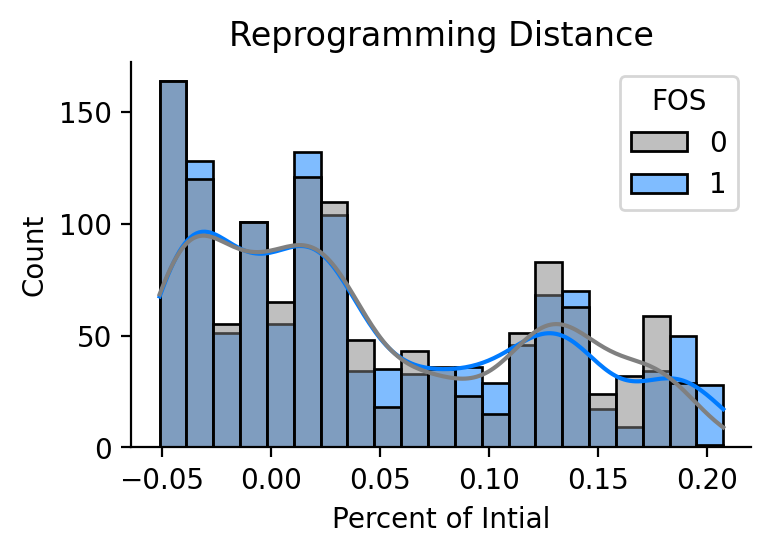

In [51]:
sns.histplot(
    data=df, 
    x='recipe_diff',
    bins=21,
    hue='FOS',
    kde=True,
    palette=['grey', '#007bff'],
)

sns.despine()
plt.title('Reprogramming Distance')
plt.xlabel('Percent of Intial')

In [100]:
df.head()

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A,core_positive
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1,False
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1,False
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1,False
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0,False
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0,True


Text(0.5, 0, 'Distance to Target')

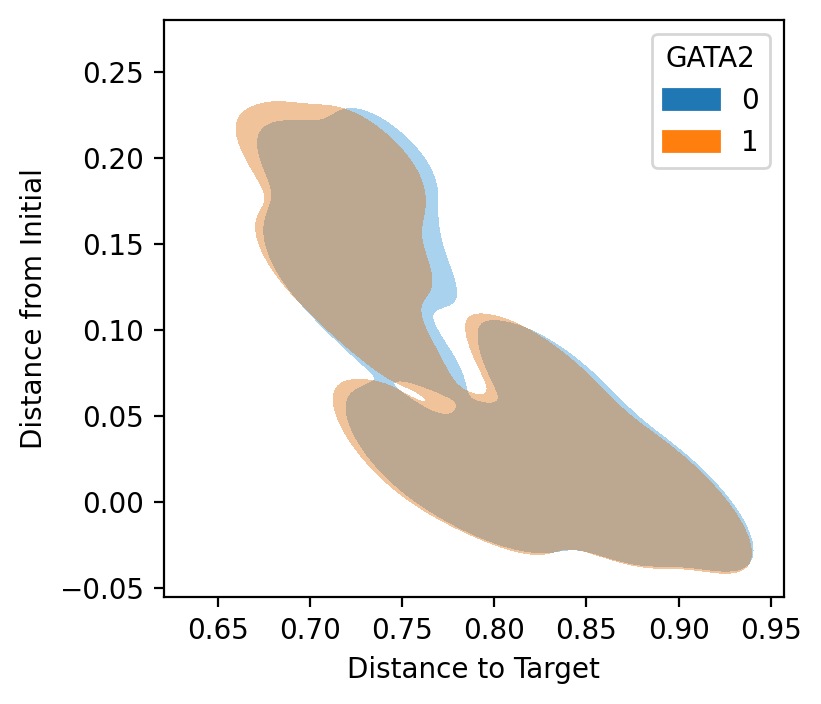

In [109]:
# 2d KDE
sns.kdeplot(
    data=df, 
    x='reprog_to_hsc_1',
    y='fib_1_to_reprog_10',
    hue='GATA2',
    fill=True,
    levels=2,
    alpha=0.4,
)

plt.ylabel('Distance from Initial')
plt.xlabel('Distance to Target')

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A,core_positive
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1,False
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1,False
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1,False
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0,False
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0,True


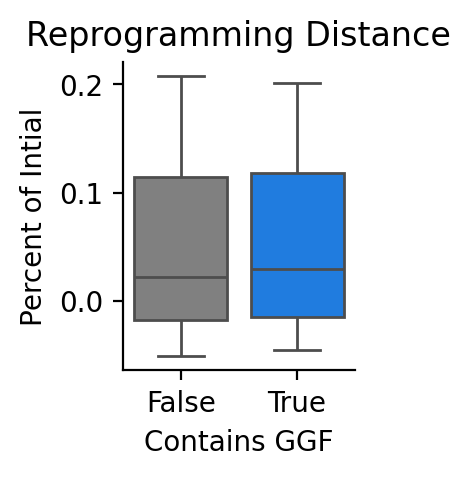

In [68]:
query = [
    'GATA2',
    'GFI1B',
    'FOS',
]

df['core_positive'] = df[query].sum(axis=1) == 3

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 1.5, 2

sns.boxplot(
    data=df, 
    x='core_positive',
    y='recipe_diff',
    hue='core_positive',
    palette=['grey', '#007bff'],
    legend=False,
)

sns.despine()
plt.title('Reprogramming Distance')
plt.ylabel('Percent of Intial')
plt.xlabel('Contains GGF')

df.head()

Text(0.5, 0, 'Contains GATA2')

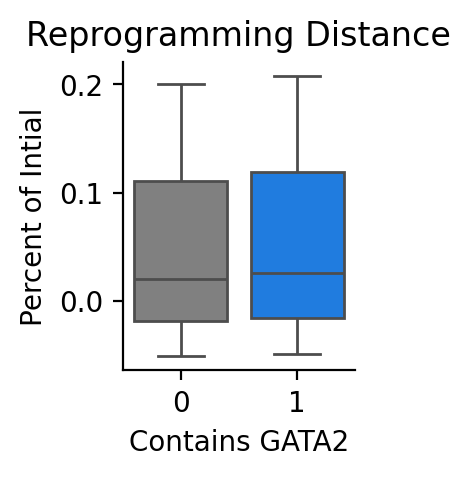

In [71]:
query = [
    'GATA2',
    'GFI1B',
    'FOS',
]

df['core_positive'] = df[query].sum(axis=1) == 3

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 1.5, 2

sns.boxplot(
    data=df, 
    x='GATA2',
    y='recipe_diff',
    hue='GATA2',
    palette=['grey', '#007bff'],
    legend=False,
)

sns.despine()
plt.title('Reprogramming Distance')
plt.ylabel('Percent of Intial')
plt.xlabel('Contains GATA2')

# plot best recipes

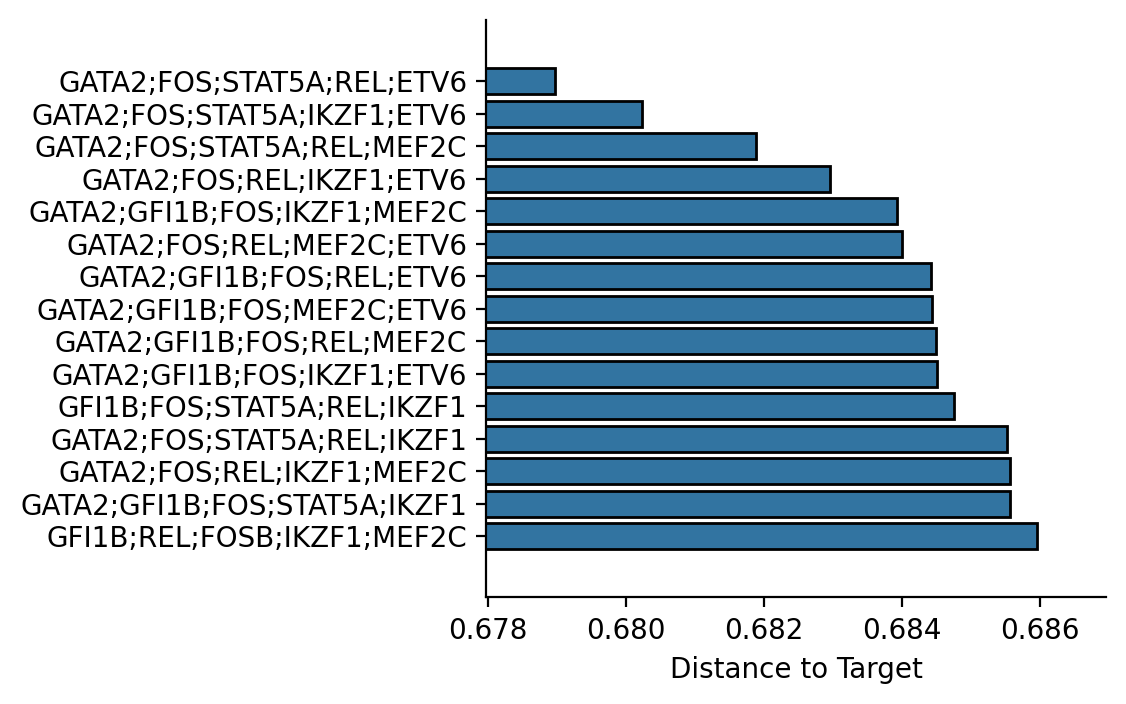

In [99]:
# plot recipes by closest to target
n_plot = 15

df = df.sort_values(by='reprog_to_hsc_1', 
                    ascending=True)


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, (n_plot / 4)
sns.barplot(
    data=df.head(n_plot),
    y='recipe',
    x='reprog_to_hsc_1',
    ec='k',
)

plt.ylabel("")
plt.xlabel("Distance to Target")
sns.despine()

plt.xlim(
    df['reprog_to_hsc_1'].head(n_plot).min()-0.001, 
    df['reprog_to_hsc_1'].head(n_plot).max()+0.001,
)
plt.margins(y=0.1, x=0.05)
